The dataset we'll use describes Euro daily exchange rates between 1999 and 2021. The euro (symbolized with €) is the official currency in most of the countries of the European Union.

If the exchange rate of the euro to the US dollar is 1.5, you get 1.5 US dollars if you pay 1.0 euro (one euro has more value than one US dollar at this exchange rate).



In [3]:
import pandas as pd
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

exchange_rates.head()
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

There are 5,699 row and 40 columns
There are null values
Data types for columns consists of Strings and Floats

In [4]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
exchange_rates['Time']

0      1999-01-04
1      1999-01-05
2      1999-01-06
3      1999-01-07
4      1999-01-08
          ...    
5694   2021-01-04
5695   2021-01-05
5696   2021-01-06
5697   2021-01-07
5698   2021-01-08
Name: Time, Length: 5699, dtype: datetime64[ns]

In [5]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']]
print(euro_to_dollar['US_dollar'].value_counts())
print(euro_to_dollar['Time'].describe())

-         62
1.2276     9
1.1215     8
1.1305     7
1.3373     6
          ..
1.0421     1
1.2460     1
0.8825     1
1.0456     1
1.3753     1
Name: US_dollar, Length: 3528, dtype: int64
count                    5699
unique                   5699
top       2006-07-20 00:00:00
freq                        1
first     1999-01-04 00:00:00
last      2021-01-08 00:00:00
Name: Time, dtype: object


In [6]:
euro_to_dollar = euro_to_dollar.loc[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
print(euro_to_dollar.dtypes)

Time         datetime64[ns]
US_dollar           float64
dtype: object


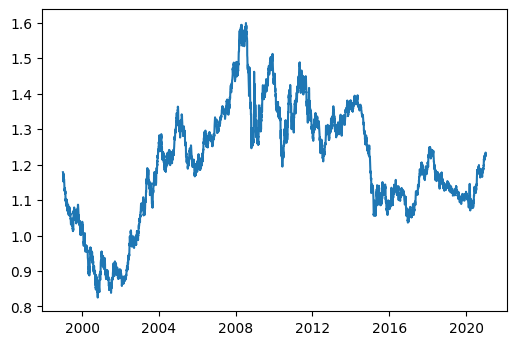

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 
#Enables Jupyter to display graphs

plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

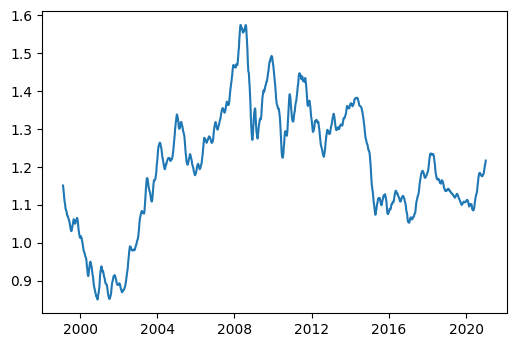

In [8]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['rolling_mean'])
plt.show()

We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.

In [39]:
euro_to_dollar['rolling_mean'].describe()

count    5608.000000
mean        1.199748
std         0.161895
min         0.849797
25%         1.101631
50%         1.204373
75%         1.319978
max         1.574333
Name: rolling_mean, dtype: float64

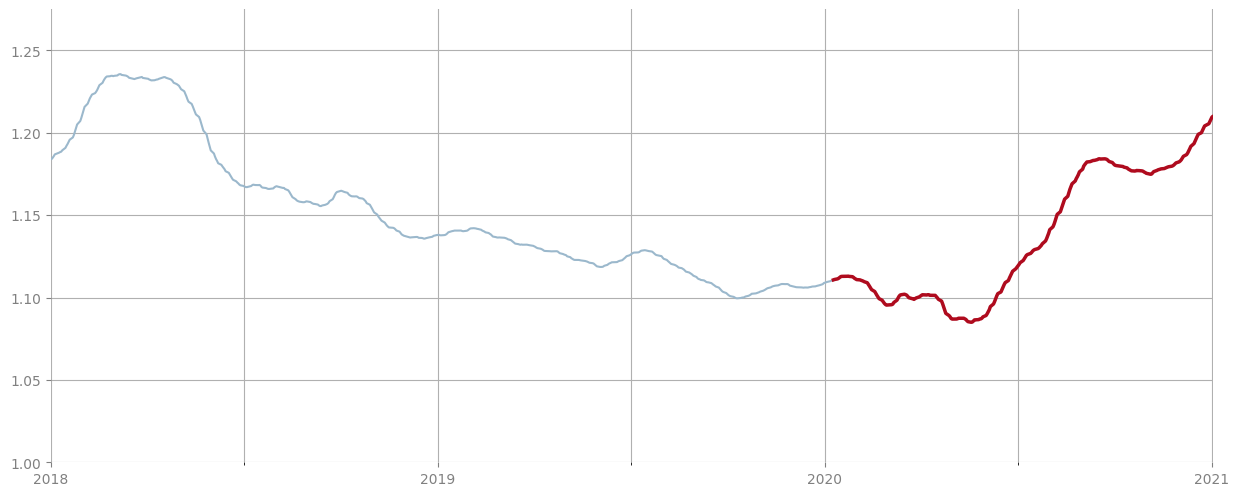

In [189]:
import numpy as np
from matplotlib.ticker import MultipleLocator
from datetime import datetime, timedelta

plt.figure(figsize=(15, 6))
ax = plt.subplot()
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['rolling_mean'], color='#9bb8cc',
        )
plt.xlim([np.datetime64('2018-01-01'), np.datetime64('2021-01-01')])
plt.plot(euro_to_dollar['Time'][5380:5694], euro_to_dollar['rolling_mean'][5380:5694],
         color='#af0b1e', linewidth=2.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

major_ticks = np.arange(np.datetime64('2018-01-01'), np.datetime64('2021-01-01'), timedelta(days=365))
minor_ticks = np.arange(np.datetime64('2018-01-01'), np.datetime64('2021-01-01'), timedelta(days=182.5))
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks,minor=True)
ax.set_xticklabels(['2018', '2019','2020','2021'])
ax.grid(which='both')

ax.tick_params(which='major', color='gray')
plt.xticks(color='gray')
plt.yticks(color='gray')
ax.set_ylim(1, 1.275)


# ax.text(x=-80000, y=23.5, s='The Euro-Dollar rate During the Pandemic',
#        size=15, weight='bold')
# ax.text(x=-80000, y=22.5, s='Top 20 countries by death toll (December 2020)',
#        size=12)

plt.show()


In [138]:
euro_to_dollar.loc[euro_to_dollar['Time']=='2019-12-30',:]

,Time,US_dollar,rolling_mean
5435,2019-12-30,1.1189,1.10813


In [148]:
euro_to_dollar['Time'][5380:5694]

5442   2020-01-09
5443   2020-01-10
5444   2020-01-13
5445   2020-01-14
5446   2020-01-15
          ...    
5694   2021-01-04
5695   2021-01-05
5696   2021-01-06
5697   2021-01-07
5698   2021-01-08
Name: Time, Length: 257, dtype: datetime64[ns]